# <center>Laboratorium 6<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

***Zadanie 1.***  

Zaimlementować wzór barycentryczny podany na wykładzie jako funkcję barycentric_inte w main.py. Następnie dla funkcji ciągłej nieróżniczkowalnej z [Zadania domoego 2] przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* jak i za zaimplementowanego wzoru barycentrycznego. W tym celu należy:

 - Wykonać w węzłach Czebyszewa (zaimplementowanych w ramach zadania domowego) interpolację rzędu 10, 100, 1000, 10000, 100000.
 - Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  
 - Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  


Przykład użycia funkcji barycentric_interpolate:

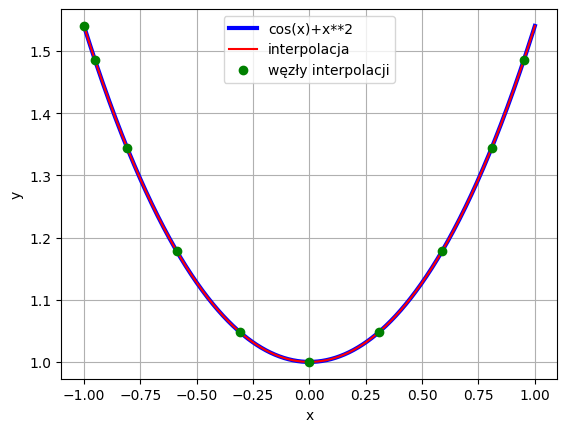

In [2]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = int(1e1)
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

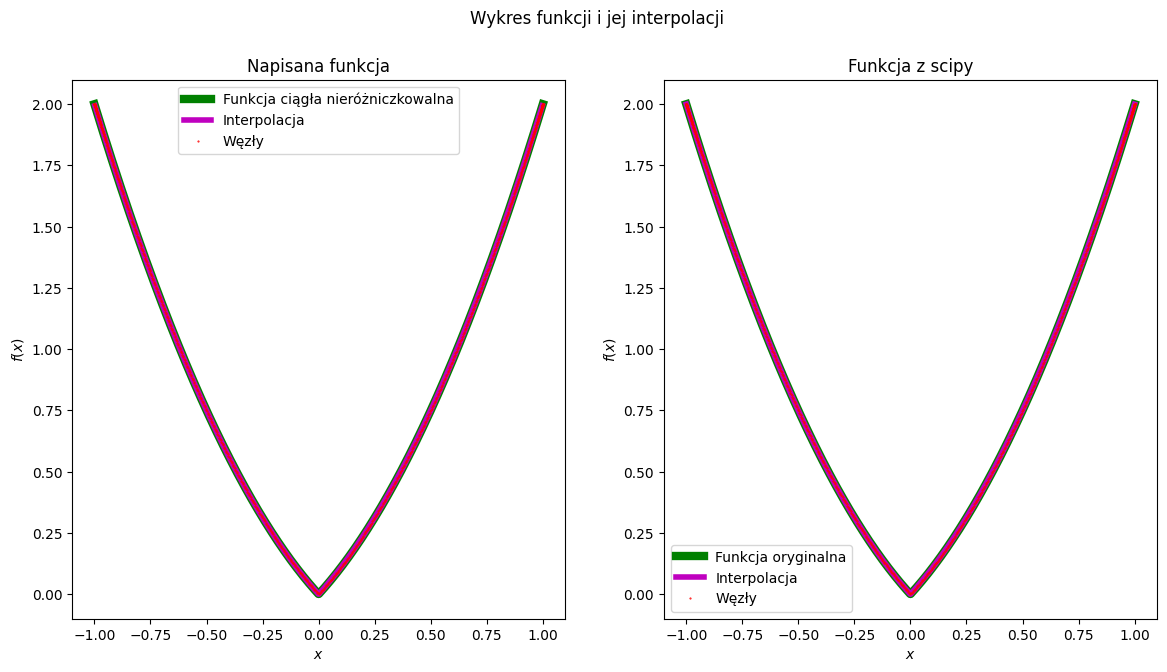

In [24]:
from scipy.interpolate import barycentric_interpolate

f_c_nieroz = lambda x: np.sign(x) * x + x**2
# rzędy interpolacji
n = [10, 100, 1000, 10000]
# 1000 punktów
x = np.linspace(-1, 1, 1000)
ch_nodes = []
weights = []
f_nodes = []
inter = []
inter_s = []

for i in range(len(n)):
    ch_nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f_nodes.append(f_c_nieroz(ch_nodes[i]))
    inter.append(main.barycentric_inte(ch_nodes[i], f_nodes[i], weights[i], x))
    inter_s.append(barycentric_interpolate(ch_nodes[i], f_nodes[i], x))
# print(inter[2])
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
fig1.suptitle('Wykres funkcji i jej interpolacji')
ax1.plot(x, f_c_nieroz(x), 'g', label='Funkcja ciągła nieróżniczkowalna', linewidth=6)
ax1.plot(x, inter[2], 'm', label='Interpolacja', linewidth=4)
ax1.plot(ch_nodes[2], f_c_nieroz(ch_nodes[2]), 'r.', label='Węzły', markersize=1)
ax1.set(xlabel='$x$', ylabel='$f(x)$')
ax1.set_title('Napisana funkcja')
ax1.legend()
ax2.plot(x, f_c_nieroz(x), 'g', label='Funkcja oryginalna', linewidth=6)
ax2.plot(x, inter_s[2], 'm', label='Interpolacja', linewidth=4)
ax2.plot(ch_nodes[2], f_c_nieroz(ch_nodes[2]), 'r.', label='Węzły', markersize=1)
ax2.set(xlabel='$x$', ylabel='$f(x)$')
ax2.set_title('Funkcja z scipy')
ax2.legend()

Porównanie czasów wykonania interpolacji w zależności od rzędu interpolacji

In [26]:
time_avg = np.zeros((len(n)))
time_std_dev = np.zeros((len(n)))
print('Czas przy użyciu napisanej funkcji:')
for i in range(N):
    print('N = ', n[i])
    print('Czas obliczeń: ')
    saved_timing = %timeit -r 5 -n 10 -o main.barycentric_inte(ch_nodes[i], f_nodes[i], weights[i], x)
    time_avg[i] = saved_timing.average
    time_std_dev[i] = saved_timing.stdev

Czas przy użyciu napisanej funkcji:
N =  10
Czas obliczeń: 


c:\Users\Piotrek\Desktop\STUDIA\STUDIA\3 sem\Metody numeryczne\lab-mn-9-ZajacPi\main.py:101: RuntimeWarning: divide by zero encountered in divide
  le = wi / (x - xi)
c:\Users\Piotrek\Desktop\STUDIA\STUDIA\3 sem\Metody numeryczne\lab-mn-9-ZajacPi\main.py:102: RuntimeWarning: invalid value encountered in scalar divide
  y.append(yi @ le / sum(le))


4.25 ms ± 95.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
N =  100
Czas obliczeń: 
10.4 ms ± 186 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
N =  1000
Czas obliczeń: 
69.7 ms ± 827 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
N =  10000
Czas obliczeń: 
698 ms ± 6.72 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [25]:
time_avg_s = np.zeros((len(n)))
time_std_dev_s = np.zeros((len(n)))
print('Czas przy użyciu modułu scipy:')
N = len(n)
for i in range(N):
    print('N = ', n[i])
    print('Czas obliczeń: ')
    saved_timing = %timeit -r 5 -n 10 -o barycentric_interpolate(ch_nodes[i], f_nodes[i], x)
    time_avg_s[i] = saved_timing.average
    time_std_dev_s[i] = saved_timing.stdev
  

Czas przy użyciu modułu scipy:
N =  10
Czas obliczeń: 
347 µs ± 33.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
N =  100
Czas obliczeń: 
1.53 ms ± 88.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
N =  1000
Czas obliczeń: 
22.9 ms ± 279 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
N =  10000
Czas obliczeń: 
616 ms ± 2.79 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


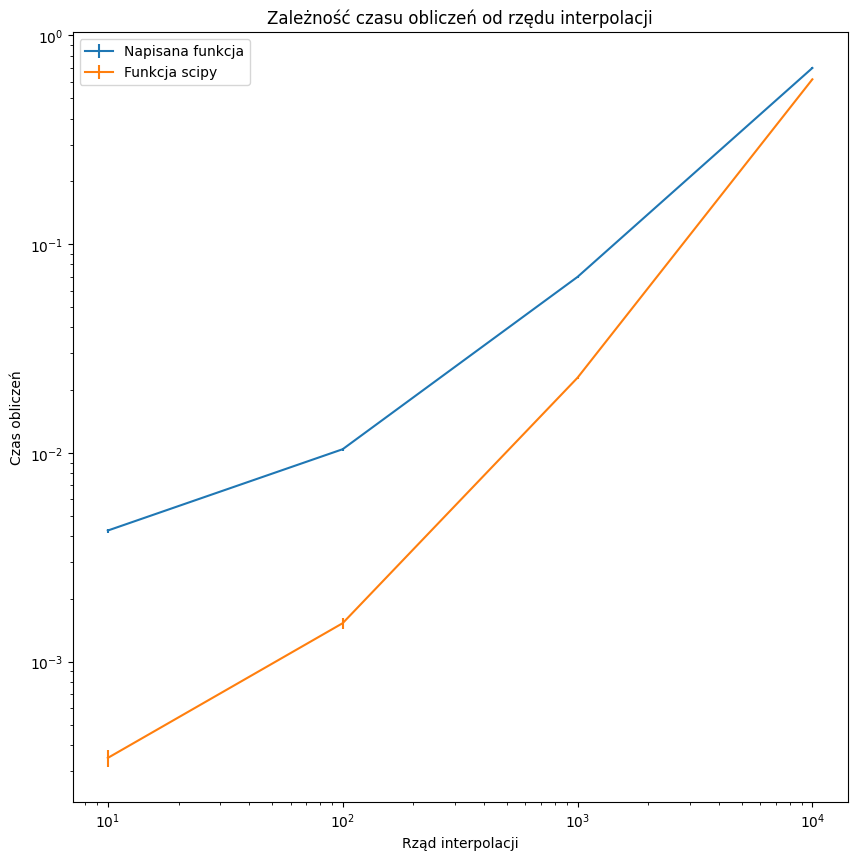

In [34]:
fig2, ax1 = plt.subplots(figsize=(10, 10))
ax1.errorbar(n, time_avg, time_std_dev, label='Napisana funkcja')
ax1.errorbar(n, time_avg_s, time_std_dev_s, label='Funkcja scipy')
ax1.set(yscale='log', xscale='log')
ax1.set(xlabel='Rząd interpolacji', ylabel='Czas obliczeń')
ax1.set_title('Zależność czasu obliczeń od rzędu interpolacji')
ax1.legend()


***Zadanie 2.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania domowego 2]. Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 

W tym celu należy:
- wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów (nie będącymi węzłami interpolacji np. punkty równoodległe),
- wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu, maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
- dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu,
- dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

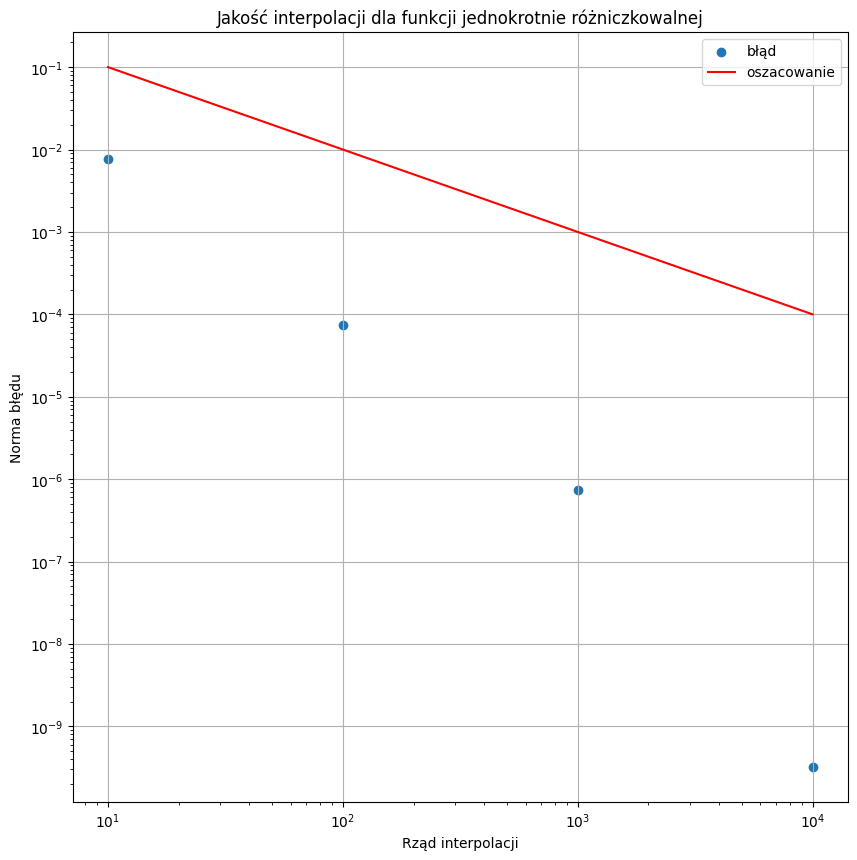

In [41]:
x = np.linspace(-0.9, 0.9, 1000)

def f_roz_jedn(x):
    return np.sign(x)*x**2

inter = []
nodes = []
weights = []
f2_n = []
l_inf1 = []
y2 = f_roz_jedn(x)
n_v = []

for i in range(len(n)):
    nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f2_n.append(f_roz_jedn(nodes[i]))
    inter.append(main.barycentric_inte(nodes[i], f2_n[i], weights[i], x))
    l_inf1.append(main.L_inf(y2, inter[i]))
    n_v.append(1 / n[i])

fig3, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Jakość interpolacji dla funkcji jednokrotnie różniczkowalnej');
ax.scatter(n, l_inf1, label='błąd')
ax.plot(n, n_v, 'r', label='oszacowanie')
ax.set(xscale='log', yscale='log')
ax.legend()
ax.set(xlabel='Rząd interpolacji', ylabel='Norma błędu')
ax.grid()


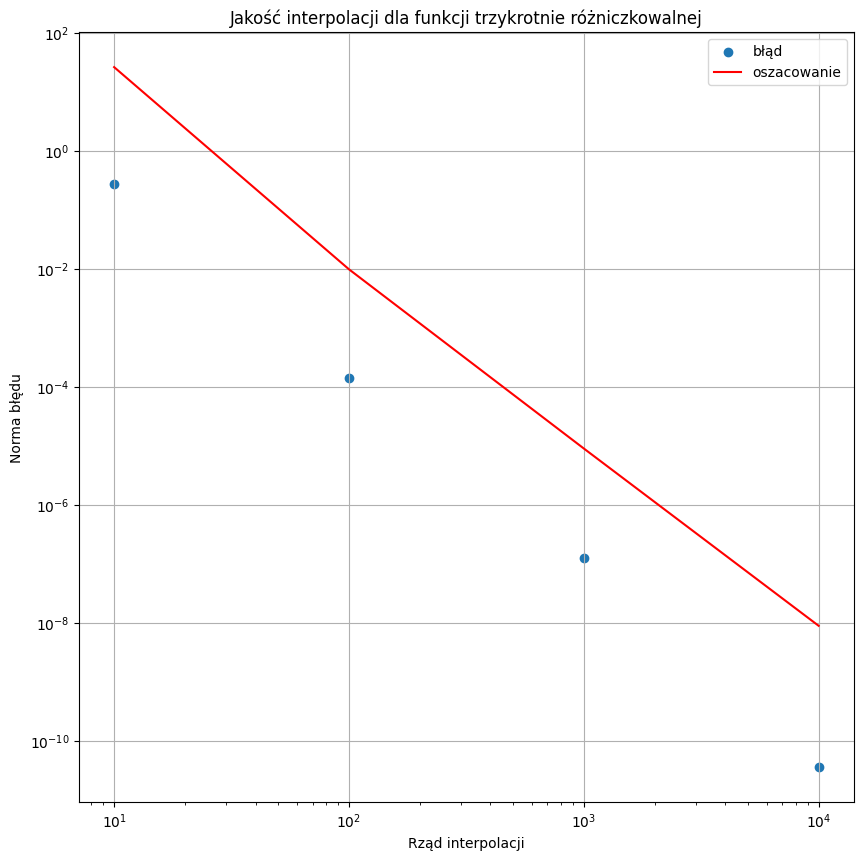

In [42]:
def f_roz_trzykr(x):
    return (np.abs(np.sin(5*x)))**3

inter = []
nodes = []
weights = []
f3_n = []
l_inf2 = []
y3 = f_roz_trzykr(x)
n_v = []

for i in range(len(n)):
    nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f3_n.append(f_roz_trzykr(nodes[i]))
    inter.append(main.barycentric_inte(nodes[i], f3_n[i], weights[i], x))
    l_inf2.append(main.L_inf(y3, inter[i]))
    n_v.append(4 * 2.102e4 / 3 / np.pi / (n[i] - 3) ** 3)

fig4, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Jakość interpolacji dla funkcji trzykrotnie różniczkowalnej');
ax.scatter(n, l_inf2, label='błąd')
ax.plot(n, n_v, 'r', label='oszacowanie')
ax.set(xscale='log', yscale='log')
ax.legend()
ax.set(xlabel='Rząd interpolacji', ylabel='Norma błędu')
ax.grid()


WNIOSKI
Wraz ze wzrostem rzędu lub ilości węzłów interpolacji wzrasta dokładność funkcji.

***Zadanie 3.***  
Dla funkcji nieciągłej z [Zadania domowego 2] przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

In [44]:
def f_nieciagla(x):
    return np.sign(x)
x = np.linspace(-0.9, 0.9, 1000)

n = []
for i in range(1, 51):
    n.append(i)

y5 = f_nieciagla(x)
nodes = []
weights = []
f5_n = []
inter = []
err_odd = []
err_even = []
n_odd = []
n_even = []

for i in range(len(n)):
    nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f5_n.append(f_nieciagla(nodes[i]))
    inter.append(main.barycentric_inte(nodes[i], f5_n[i], weights[i], x))
    if n[i] % 2 == 0:
        err_even.append(main.L_inf(y5, inter[i]))
        n_even.append(n[i])
    else:
        err_odd.append(main.L_inf(y5, inter[i]))
        n_odd.append(n[i])
        

c:\Users\Piotrek\Desktop\STUDIA\STUDIA\3 sem\Metody numeryczne\lab-mn-9-ZajacPi\main.py:101: RuntimeWarning: divide by zero encountered in divide
  le = wi / (x - xi)
c:\Users\Piotrek\Desktop\STUDIA\STUDIA\3 sem\Metody numeryczne\lab-mn-9-ZajacPi\main.py:102: RuntimeWarning: invalid value encountered in scalar divide
  y.append(yi @ le / sum(le))


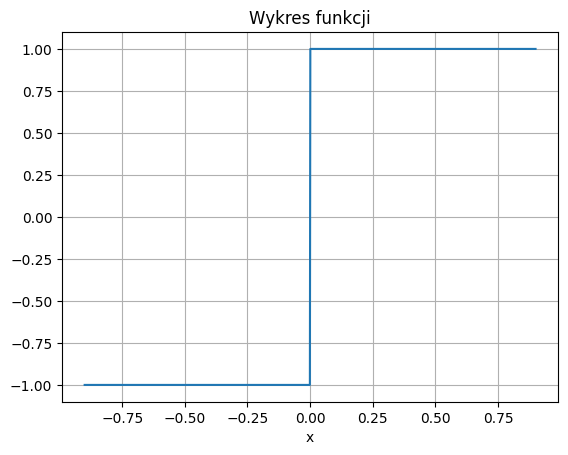

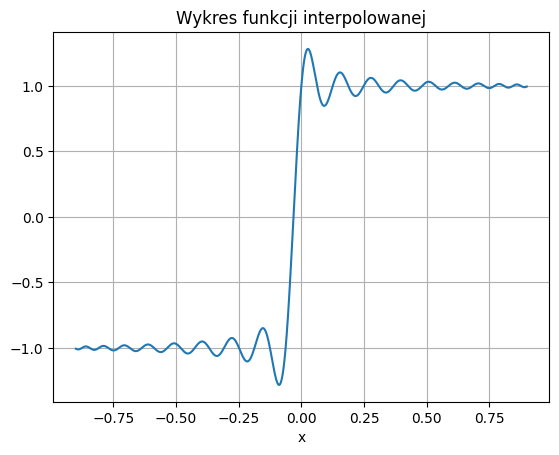

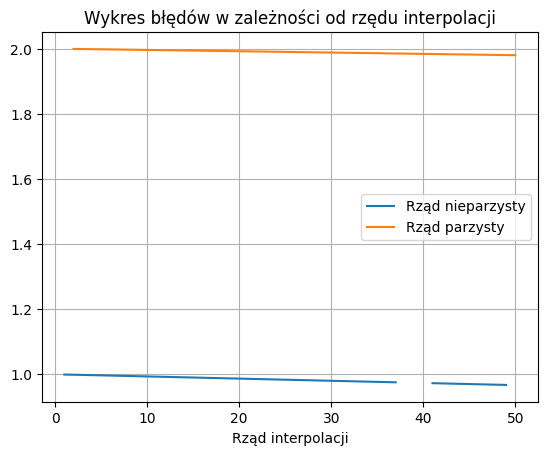

In [63]:
plt.figure()
plt.plot(x, y5)
plt.xlabel('x')
plt.title('Wykres funkcji')
plt.grid()

plt.figure()
plt.plot(x, inter[49])
plt.xlabel('x')
plt.title('Wykres funkcji interpolowanej')
plt.grid()

plt.figure()
plt.plot(n_odd, err_odd, label='Rząd nieparzysty')
plt.plot(n_even, err_even, label='Rząd parzysty')
plt.xlabel('Rząd interpolacji') 
plt.title('Błędy w zależności od rzędu interpolacji')
plt.grid()
plt.legend()

plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)